# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

# Loading the data

In [40]:
# Importing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
import warnings
warnings.filterwarnings("ignore")

Warnings library aims to suppress Python warnings

In [42]:
df = pd.read_csv("train.csv")
df.shape

(550068, 12)

Reading the training data from Kaggle to train the model on. It has 550068 rows and 12 columns.

In [43]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969




---



# Analysing the Data

In [44]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [46]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Null values are present in 2 columns.

# Data Cleaning


In [47]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [48]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_na:
    print(f"{feature} has {np.round(df[feature].isnull().mean() * 100, 2)}% missing values")


Product_Category_2 has 31.57% missing values
Product_Category_3 has 69.67% missing values


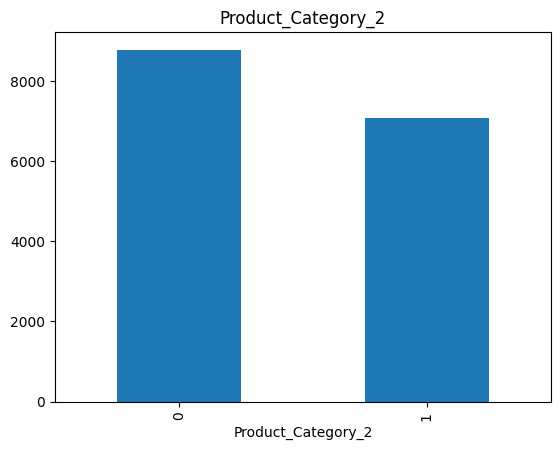

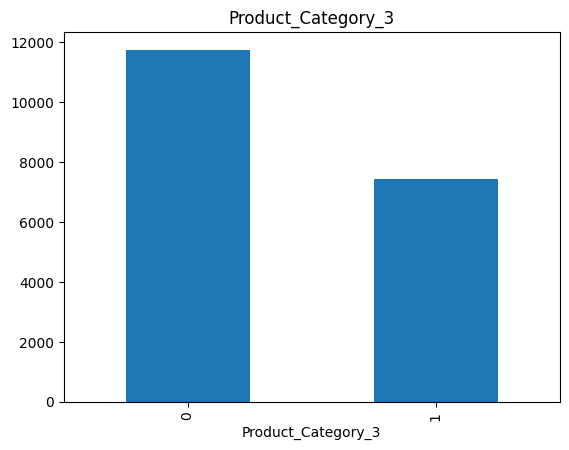

In [49]:
for feature in features_na:
    data = df.copy()
    data[feature] = np.where(df[feature].isnull(), 1, 0)
# Assigning 1 to missing values and 0 to non-missing values

    data.groupby(feature)['Purchase'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here we can see that the relation between the missing values and the dependent variable is clearly visible.So we will be replacing these nan values with something meaningful.

In [50]:
df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0], inplace=True)

In [51]:
df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0], inplace=True)

The null values are imputed with the mode, the most frequent category from each column respectively.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [53]:
print(f"Product_Category_2: {df['Product_Category_2'].unique()}")
print(f"Product_Category_3: {df['Product_Category_3'].unique()}")

Product_Category_2: [ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3: [16. 14. 17.  5.  4. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


We can see that Product_Category_2 and Product_Category_3 are float64 data type. But upon checking the unique values present in both columns we can see that there is no float values present and we can format the data type of the columns to int64 to reduce the computational burden.



In [54]:
df['Product_Category_2'].astype(int)
df['Product_Category_3'].astype(int)

0         16
1         14
2         16
3         16
4         16
          ..
550063    16
550064    16
550065    16
550066    16
550067    16
Name: Product_Category_3, Length: 550068, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


The data types are formatted correctly.

In [56]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

All missing values has been dealt with.

In [57]:
df = df.drop(columns=['User_ID', 'Product_ID'])

Removing User ID and Product ID as they are not needed for our model.

In [58]:
df["Age"]

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object



---



# Feature Engineering

Ordinal Encoding the Age column as it an Ordinal variable.

**Ordinal Variable - An ordinal variable in a data science project represents categories with a meaningful order or ranking.**

In [59]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [60]:
df["Age"] = df["Age"].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})


Mapping age categories to numerical values from 1 to 7 in ascending order, maintaining the hierarchical relationship between age groups.

In [61]:
##second technqiue
"""
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
"""

"\nfrom sklearn import preprocessing\n\nlabel_encoder = preprocessing.LabelEncoder()\n\n# Encode labels in column 'species'.\ndf['Age']= label_encoder.fit_transform(df['Age'])\n"

In [62]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [63]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+','').astype(int)

Removing the '+'from '4+' so that it can be converted to an int64 data type column.

# Feature Processing


Feature Classification

**Feature - A feature refers to an individual measurable property or characteristic of a phenomenon being observed, typically used as input for predictive models or analysis.**

In [64]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
df[numerical_features]

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,10,2,0,3,8.0,16.0,8370
1,1,10,2,0,1,6.0,14.0,15200
2,1,10,2,0,12,8.0,16.0,1422
3,1,10,2,0,12,14.0,16.0,1057
4,7,16,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...
550063,6,13,1,1,20,8.0,16.0,368
550064,3,1,3,0,20,8.0,16.0,371
550065,3,15,4,1,20,8.0,16.0,137
550066,7,1,2,0,20,8.0,16.0,365


All numerical datatypes has been grouped together. However, it can be observed that some of the features, while they are numerical, is categorical in nature.
Eg: Marital_Status being 1 or 0 indicating Yes or No respectively.

In [65]:
ordinal_features = ['Age']
df[ordinal_features]

,Age
0,1
1,1
2,1
3,1
4,7
...,...
550063,6
550064,3
550065,3
550066,7


Manually specifying the Ordinal features to avoid misclassification

In [66]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature not in ordinal_features or 'Category' in feature]
df[categorical_features]

,Gender,City_Category,Product_Category_1,Product_Category_2,Product_Category_3
0,F,A,3,8.0,16.0
1,F,A,1,6.0,14.0
2,F,A,12,8.0,16.0
3,F,A,12,14.0,16.0
4,M,C,8,8.0,16.0
...,...,...,...,...,...
550063,M,B,20,8.0,16.0
550064,F,C,20,8.0,16.0
550065,F,B,20,8.0,16.0
550066,F,C,20,8.0,16.0


Classifying Categorical features as those with an Object datatype and not an Ordinal feature, or feature with the phrase Category in it.



In [67]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25] + categorical_features
df[discrete_features]

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender,City_Category,Product_Category_1,Product_Category_2,Product_Category_3
0,1,10,2,0,3,8.0,16.0,F,A,3,8.0,16.0
1,1,10,2,0,1,6.0,14.0,F,A,1,6.0,14.0
2,1,10,2,0,12,8.0,16.0,F,A,12,8.0,16.0
3,1,10,2,0,12,14.0,16.0,F,A,12,14.0,16.0
4,7,16,4,0,8,8.0,16.0,M,C,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,6,13,1,1,20,8.0,16.0,M,B,20,8.0,16.0
550064,3,1,3,0,20,8.0,16.0,F,C,20,8.0,16.0
550065,3,15,4,1,20,8.0,16.0,F,B,20,8.0,16.0
550066,7,1,2,0,20,8.0,16.0,F,C,20,8.0,16.0


Classifying Discrete features as those features present in the numerical features that have less than 25 unique values, along with the categoriccal features as they are discrete in nature.

The threshold 25 is not constant and is merely chosen for this specific dataset.


**Discrete Feature - A discrete feature represents variables with distinct, separate values, often countable and non-continuous, used for analysis or modeling.**

## Discrete Features

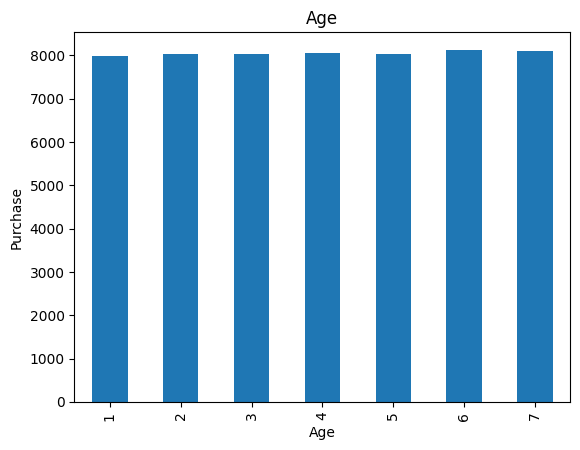

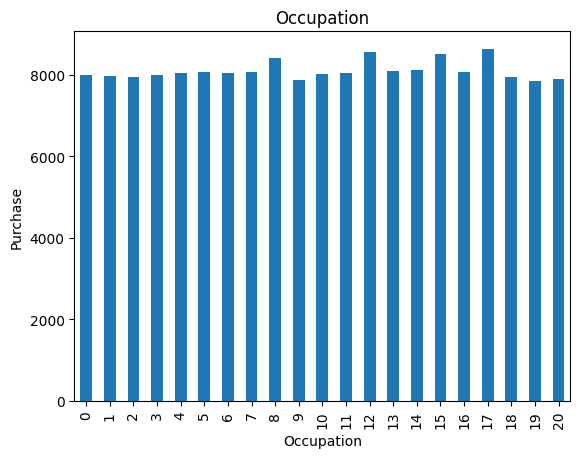

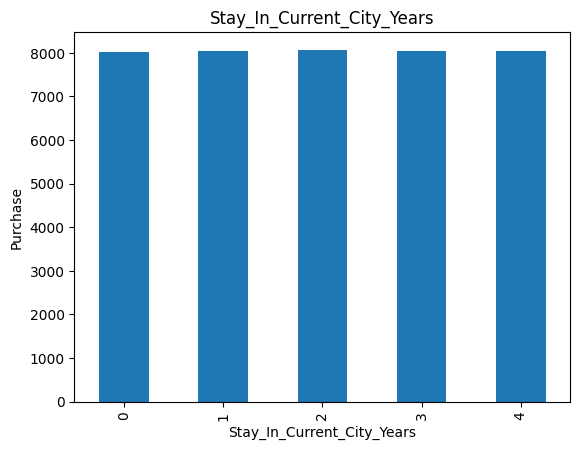

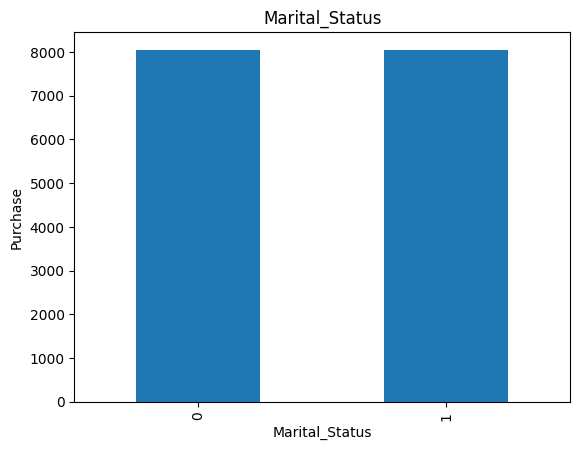

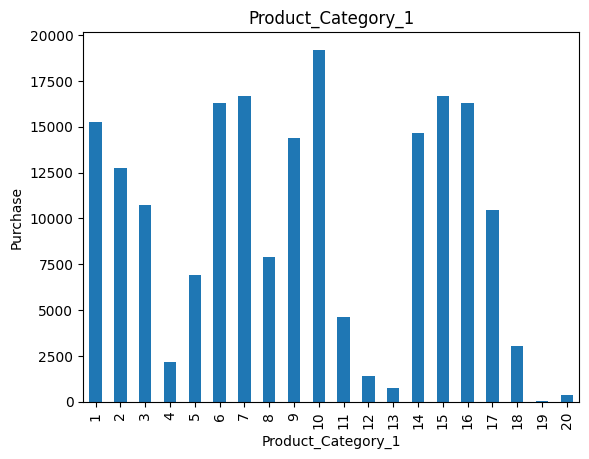

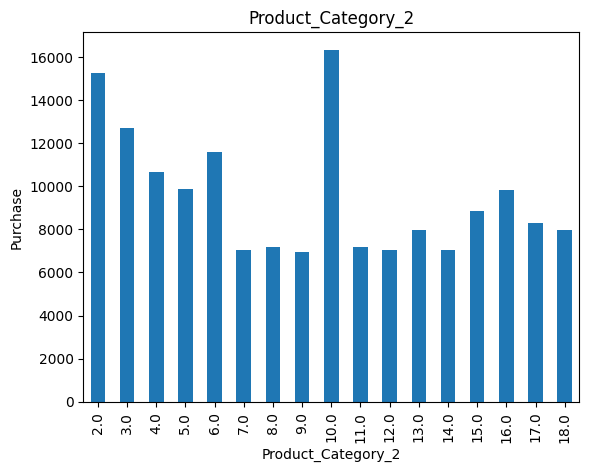

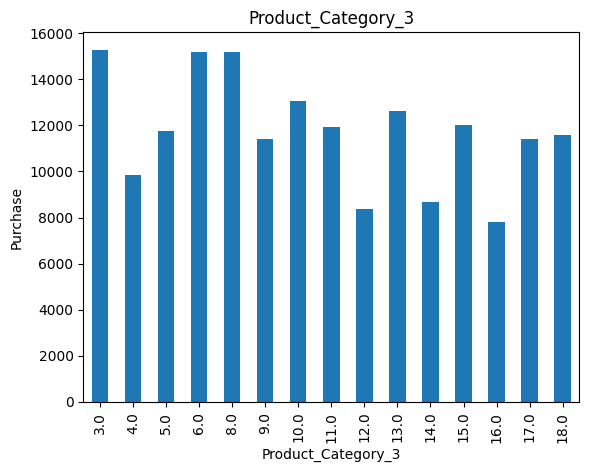

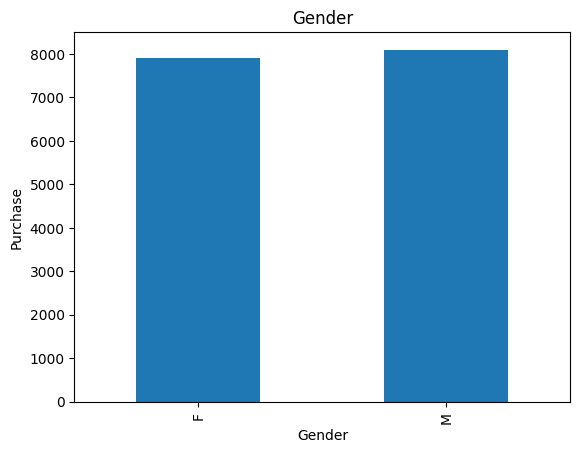

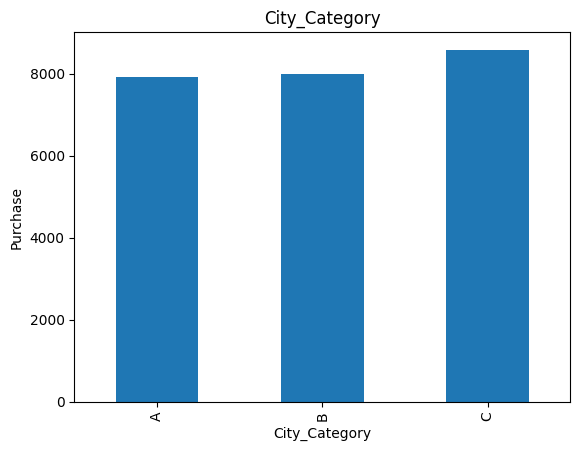

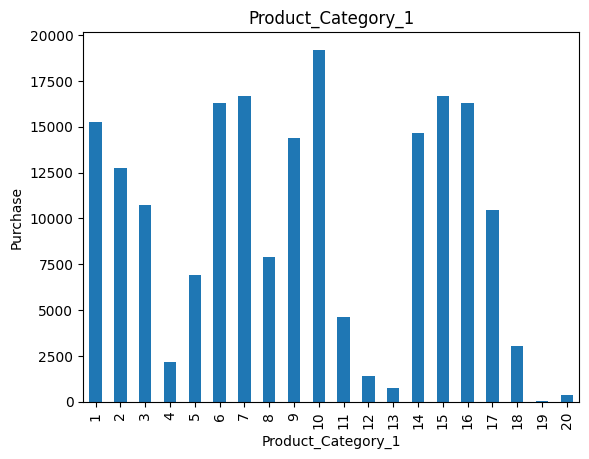

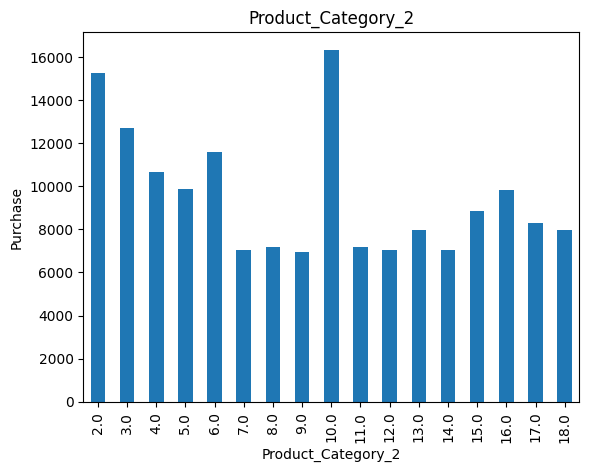

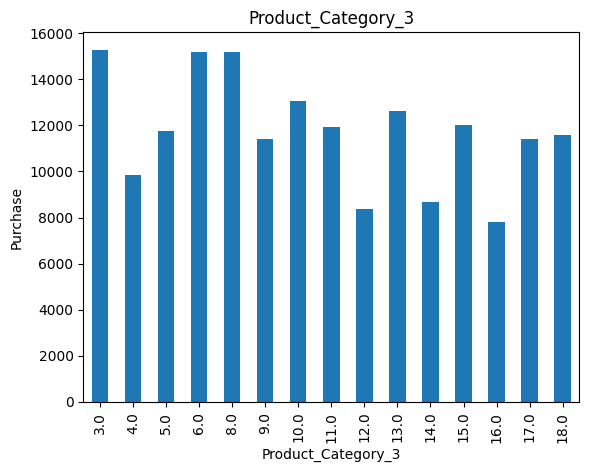

In [68]:
for feature in discrete_features:
    data=df.copy()
    data.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.title(feature)
    plt.show()

Plotting all discrete varaibles against the median purchase.

## Continuous Feature

In [69]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in ordinal_features]
continuous_features

['Purchase']

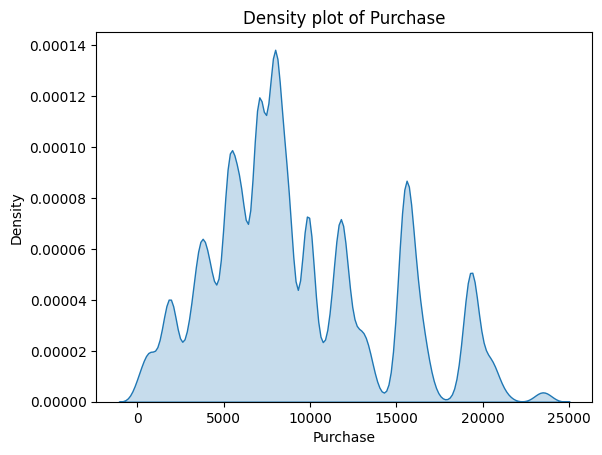

In [70]:
sns.kdeplot(data=df['Purchase'], shade=True)
plt.title('Density plot of Purchase')
plt.show()

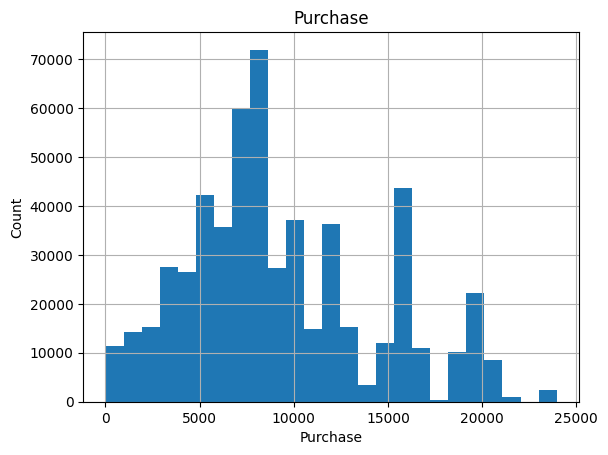

Skewness of Purchase: 0.6001383671643447


In [71]:
from scipy.stats import skew

skewness = {}

for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

    skewness[feature] = skew(data[feature])
    print(f"Skewness of {feature}: {skewness[feature]}")


The Purchase data is not Gaussian in nature and is moderately skewed(If the skewness value is between -1 and -0.5 (or between 0.5 and 1), the distribution is moderately skewed).

Categorical Features

In [72]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Gender and number of categories are 2
The feature is City_Category and number of categories are 3
The feature is Product_Category_1 and number of categories are 20
The feature is Product_Category_2 and number of categories are 17
The feature is Product_Category_3 and number of categories are 15


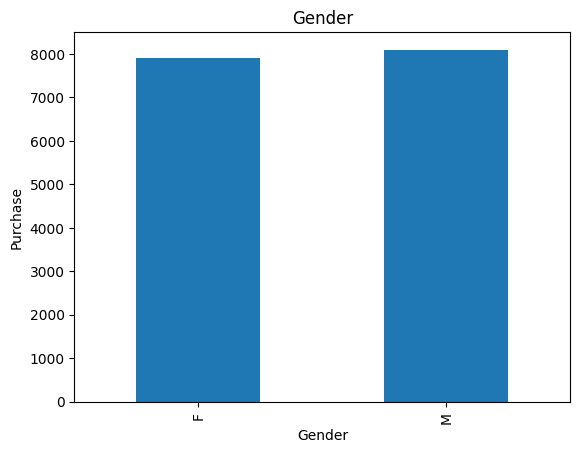

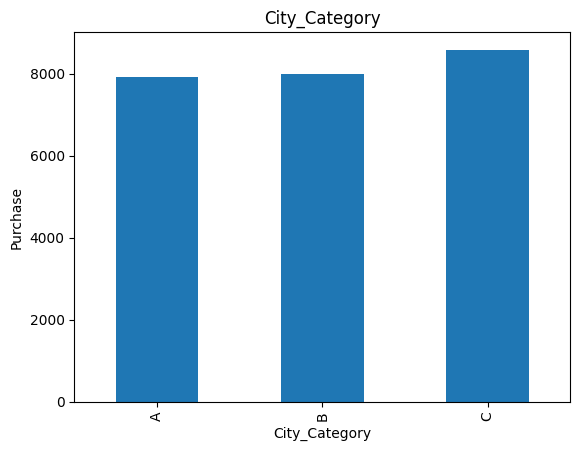

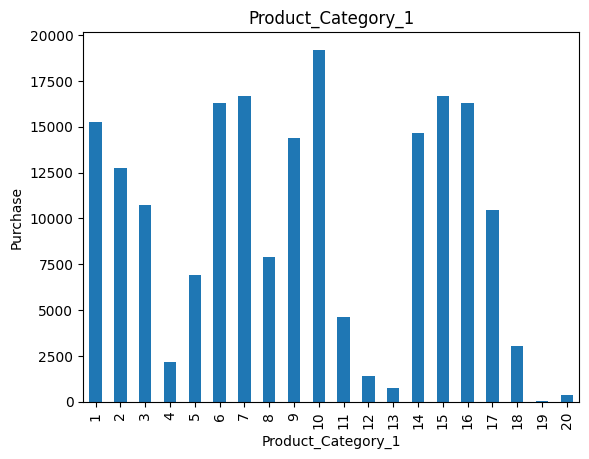

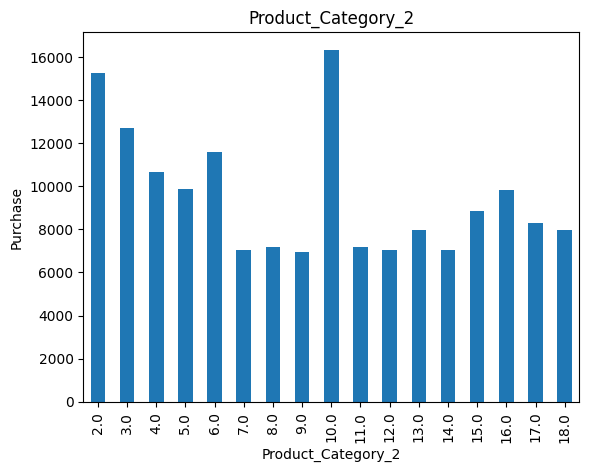

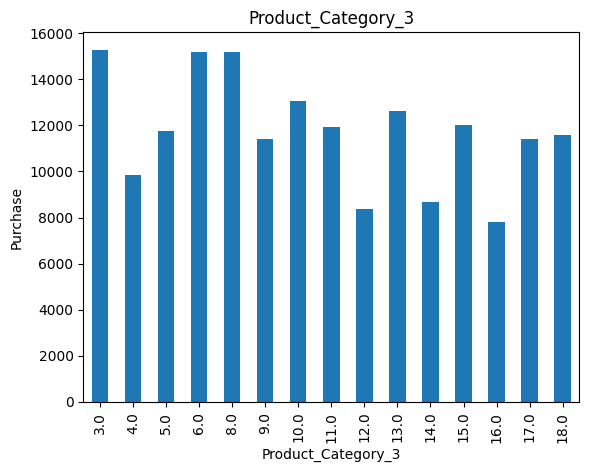

In [73]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.title(feature)
    plt.show()

In [74]:
df["Gender"] = df["Gender"].map({"F":0, "M":1})

In [75]:
df_city = pd.get_dummies(df["City_Category"], dtype=int, drop_first=True)
df = pd.concat([df, df_city] , axis=1)
df.drop(['City_Category'], axis=1, inplace=True)

# Removing Outliers

Finding Outliers

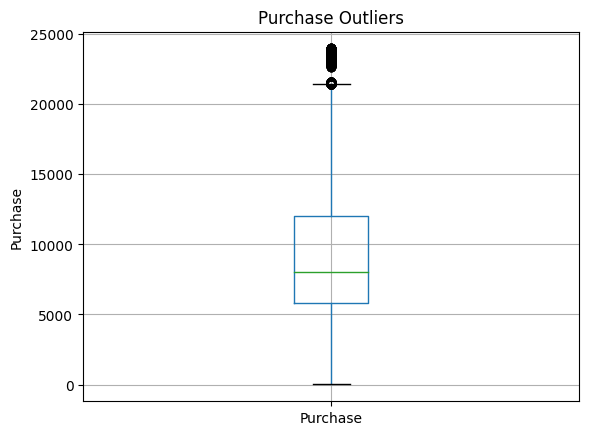

Number of outliers present in Purchase: 2677
Precentage of outliers present in Purchase: 0.4866671029763593 %


In [76]:
for feature in continuous_features:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(f"{feature} Outliers")
    plt.show()

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"Number of outliers present in {feature}: {num_outliers}")
    print(f"Precentage of outliers present in {feature}: {(num_outliers/df.shape[0])*100} %")

The outliers can be either treated or left as such. If left as such, we should use a Model that is not sensitive outliers like Random Forests. If we are to test with Models that are sensitive to outliers as well, treating the outliers beccome necessary.
We chose to remove the outliers all together as the percentage of outliers present is so small and insignificant.

In [77]:
outlier_indices = outliers.index
df = df.drop(outlier_indices)

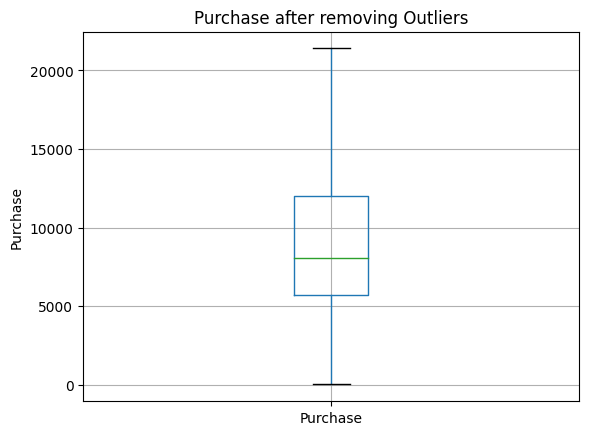

Number of outliers present in Purchase: 0


In [78]:
for feature in continuous_features:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(f"{feature} after removing Outliers")
    plt.show()

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"Number of outliers present in {feature}: {num_outliers}")
    plt.show()

# Correlation Analysis

Finding the pearson coefficient of correlation (Multivariate Analysis)

In [79]:
numeric_variables = df.select_dtypes(include=['number'])
corr_matrix = numeric_variables.corr()

In [80]:
corr_matrix.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

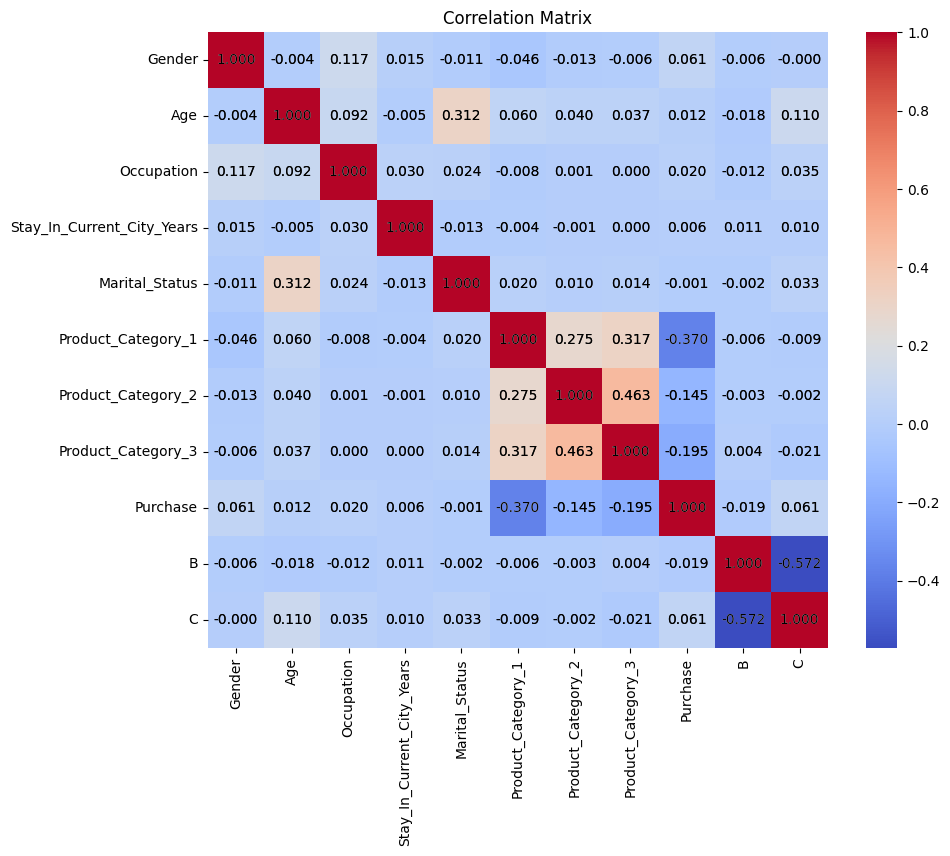

In [81]:
numeric_variables = df.select_dtypes(include=['number'])
corr_matrix = numeric_variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]:.3f}",
                 ha="center", va="center", color="black")
plt.title('Correlation Matrix')
plt.show()

Plotting the correlation matrix we can see the corresponding corelations among all features.

# Bivariate Analysis

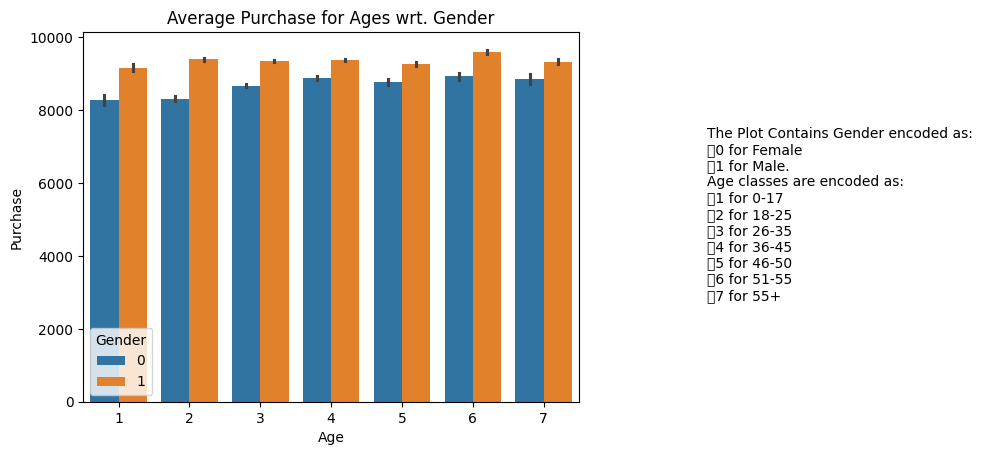

In [82]:
sns.barplot(x="Age", y="Purchase", hue=df["Gender"].astype(str), data = df)
plt.title('Average Purchase for Ages wrt. Gender')
# Adding a note outside the plot area
plt.text(1.1, 0.5, 'The Plot Contains Gender encoded as:\n\t0 for Female\n\t1 for Male.\nAge classes are encoded as:\n\t1 for 0-17\n\t2 for 18-25\n\t3 for 26-35\n\t4 for 36-45\n\t5 for 46-50\n\t6 for 51-55\n\t7 for 55+',
         fontsize=10, verticalalignment='center', transform=plt.gcf().transFigure)
plt.show()

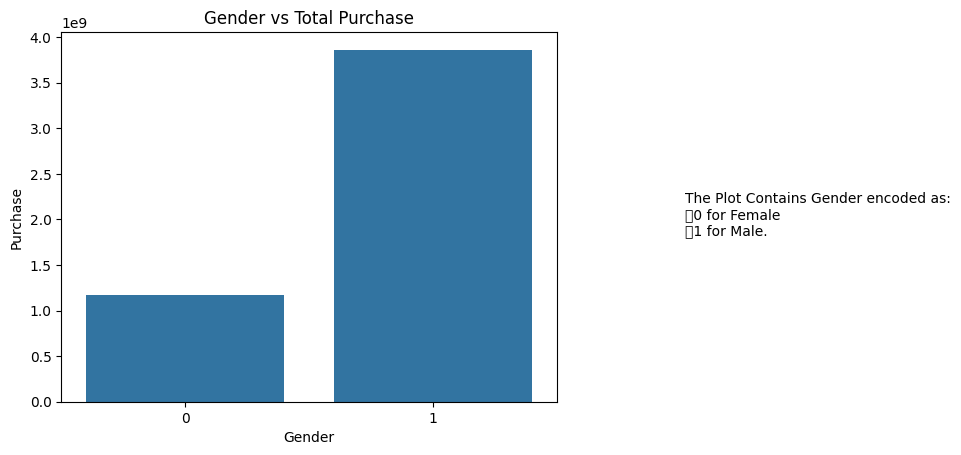

In [83]:
purchase_by_gender = df.groupby('Gender')['Purchase'].sum().reset_index()
sns.barplot(x="Gender", y="Purchase",data = purchase_by_gender)
plt.text(1.1, 0.5, 'The Plot Contains Gender encoded as:\n\t0 for Female\n\t1 for Male.',
         fontsize=10, verticalalignment='center', transform=plt.gcf().transFigure)
plt.title('Gender vs Total Purchase')
plt.show()

1. Men has more total purchase amount than Women according to the data

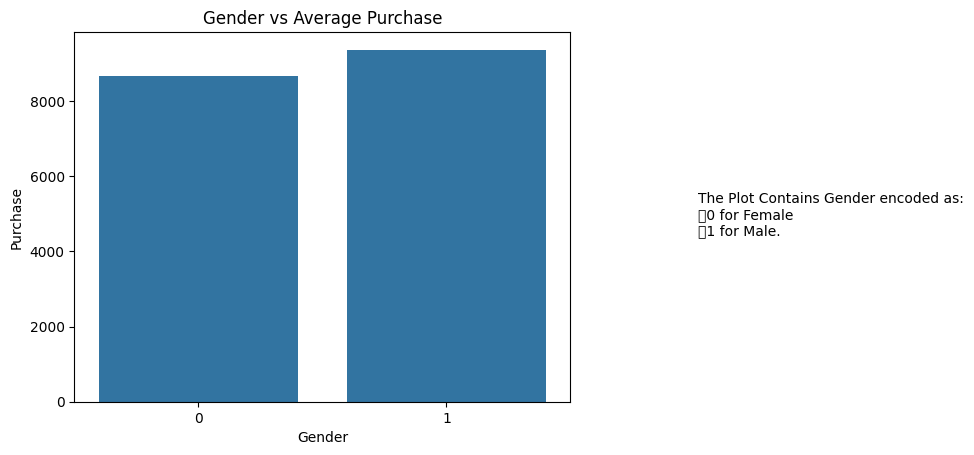

In [84]:
purchase_by_gender = df.groupby('Gender')['Purchase'].mean().reset_index()
sns.barplot(x="Gender", y="Purchase",data = purchase_by_gender)
plt.text(1.1, 0.5, 'The Plot Contains Gender encoded as:\n\t0 for Female\n\t1 for Male.',
         fontsize=10, verticalalignment='center', transform=plt.gcf().transFigure)
plt.title('Gender vs Average Purchase')
plt.show()

2. Though Men purchase more, Men and Women generally purchase the same amount when they do purchase.

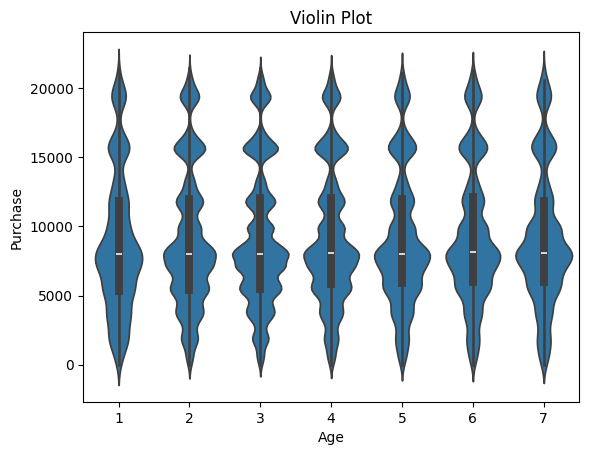

In [85]:
sns.violinplot(x="Age", y="Purchase", data=df)
plt.title('Violin Plot')
plt.show()

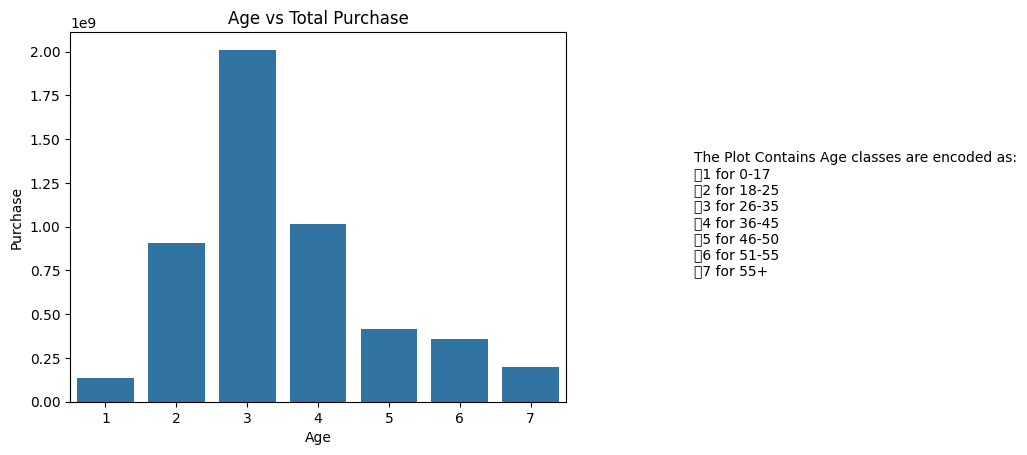

In [86]:
age_by_gender = df.groupby('Age')['Purchase'].sum().reset_index()
sns.barplot(x="Age", y="Purchase",data = age_by_gender)
plt.text(1.1, 0.5, 'The Plot Contains Age classes are encoded as:\n\t1 for 0-17\n\t2 for 18-25\n\t3 for 26-35\n\t4 for 36-45\n\t5 for 46-50\n\t6 for 51-55\n\t7 for 55+',
         fontsize=10, verticalalignment='center', transform=plt.gcf().transFigure)
plt.title('Age vs Total Purchase')
plt.show()

3. Age affects the purchase power in terms of Total amount purchased.

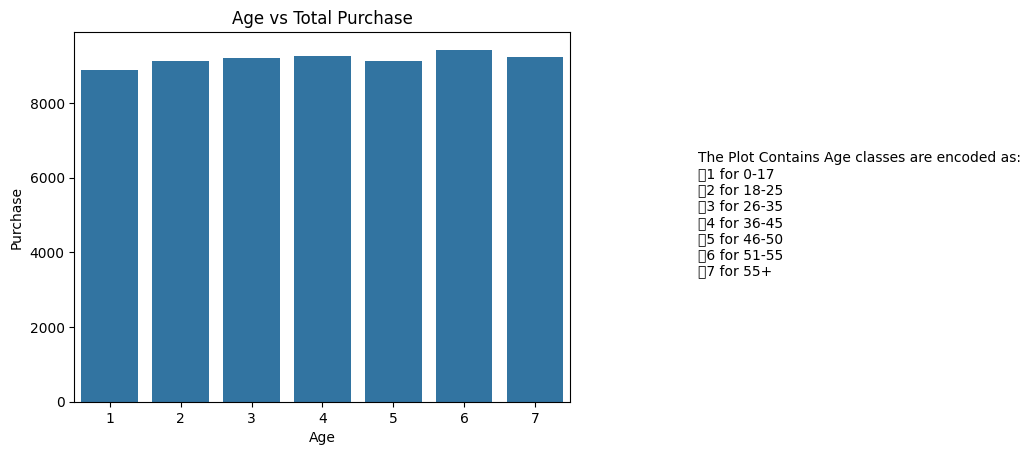

In [87]:
age_by_gender = df.groupby('Age')['Purchase'].mean().reset_index()
sns.barplot(x="Age", y="Purchase",data = age_by_gender)
plt.text(1.1, 0.5, 'The Plot Contains Age classes are encoded as:\n\t1 for 0-17\n\t2 for 18-25\n\t3 for 26-35\n\t4 for 36-45\n\t5 for 46-50\n\t6 for 51-55\n\t7 for 55+',
         fontsize=10, verticalalignment='center', transform=plt.gcf().transFigure)
plt.title('Age vs Total Purchase')
plt.show()

4. Though the middle aged customers purchase more, the average purchase amount for all classes are similar.

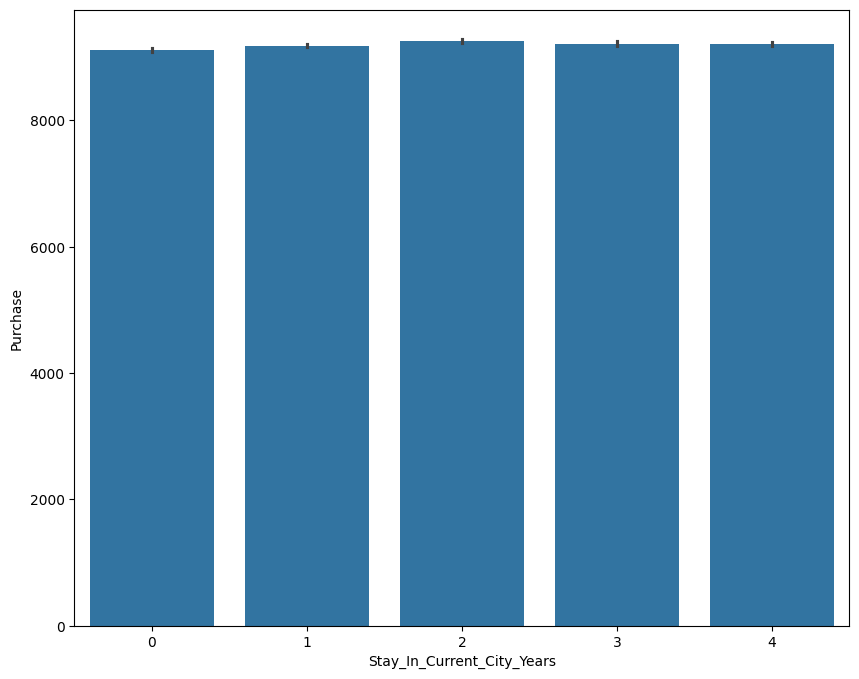

In [90]:
plt.figure(figsize=(10,8))
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data = df)
plt.show('Years stayed in City vs Average Purchase')

All the groups have similar effect on the purchase on average.

### Categorical Outliers

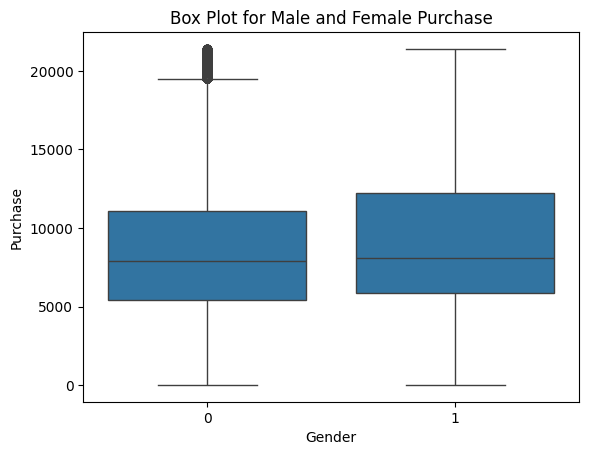

In [91]:
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.title('Box Plot for Male and Female Purchase')
plt.show()

We chose to leave these outliers as such.

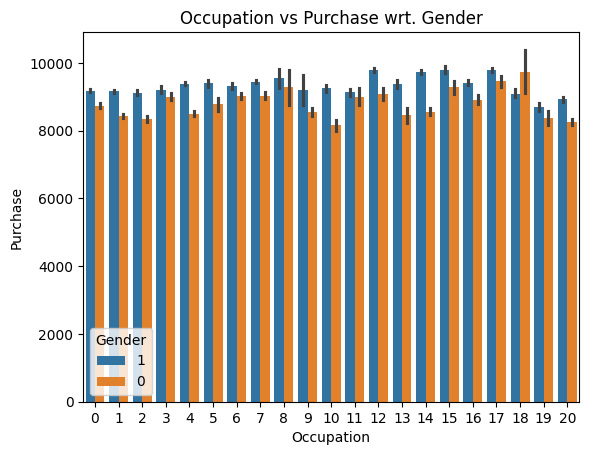

In [92]:
sns.barplot(x="Occupation", y="Purchase", hue=df["Gender"].astype(str), data=df)
plt.title('Occupation vs Purchase wrt. Gender')
plt.show()

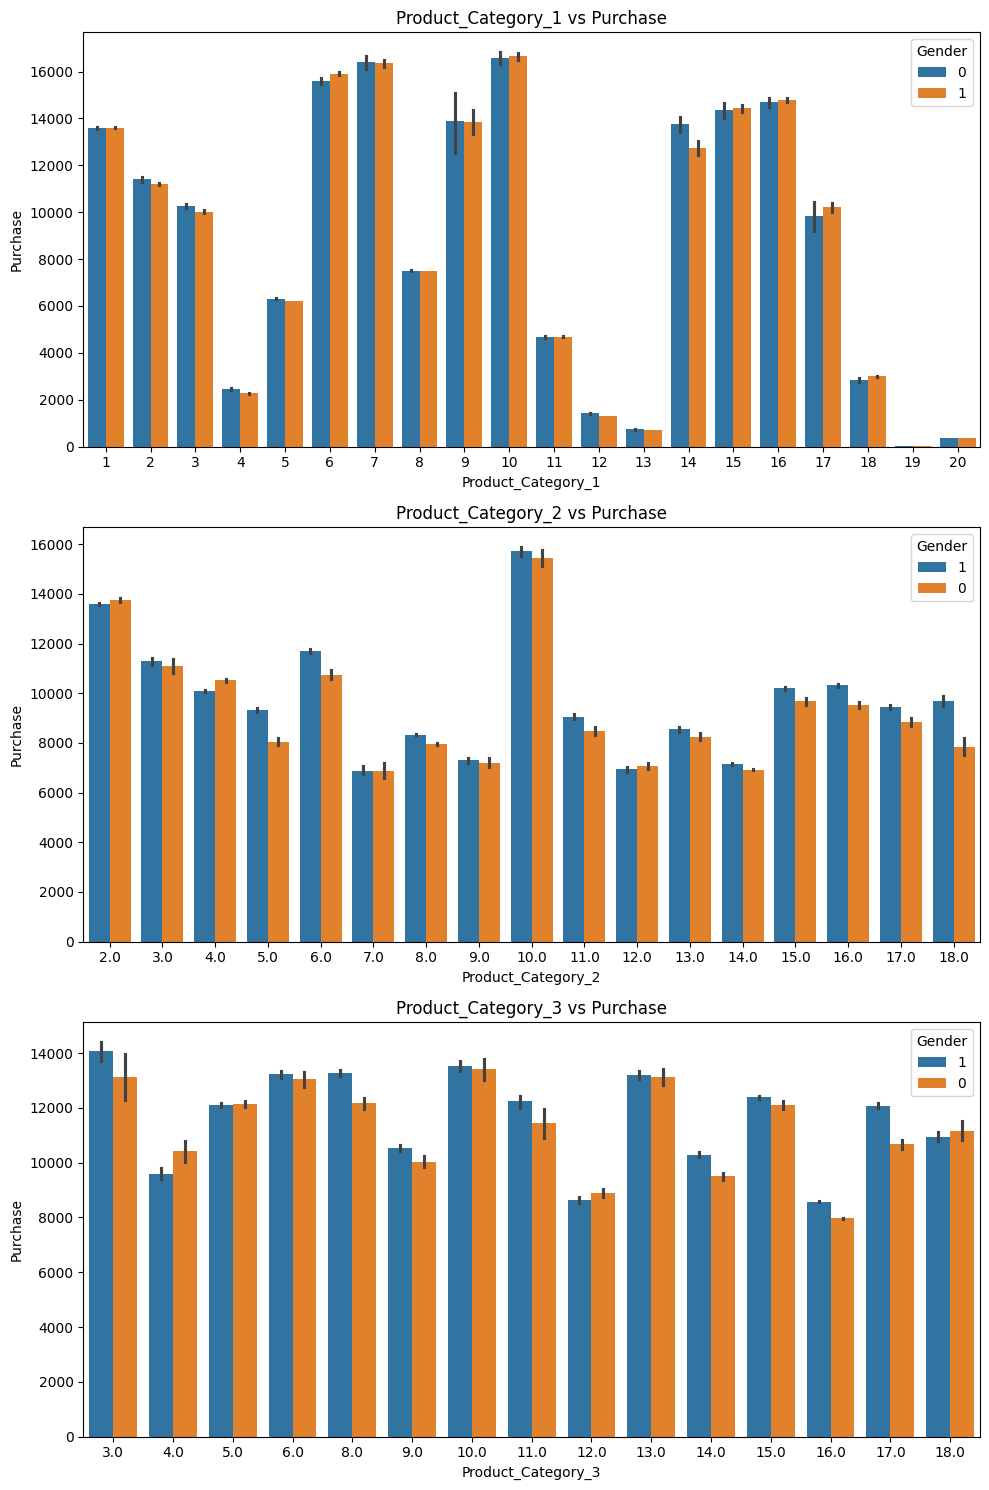

In [93]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x="Product_Category_1", y="Purchase", hue=df["Gender"].astype(str), data=df, ax=axs[0])
sns.barplot(x="Product_Category_2", y="Purchase", hue=df["Gender"].astype(str), data=df, ax=axs[1])
sns.barplot(x="Product_Category_3", y="Purchase", hue=df["Gender"].astype(str), data=df, ax=axs[2])

axs[0].set_title('Product_Category_1 vs Purchase')
axs[1].set_title('Product_Category_2 vs Purchase')
axs[2].set_title('Product_Category_3 vs Purchase')

plt.tight_layout()
plt.show()

# Model Building

In [94]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
svm_model = SVR()

neural_network_model = Sequential([
  Dense(64, activation='relu', input_shape=(10,)),
  Dense(32, activation='relu'),
  Dense(1) ])
neural_network_model.compile(optimizer='adam', loss='mean_squared_error')

Importing all necessary libraries for machine learning including model evaluation metrics and various regression models and a neural network model and initialising the models.

In [95]:
X = df.drop(["Purchase"], axis=1)
X.shape

(547391, 10)

Splitting Dataset to get X as all the features required for the regression task.



In [96]:
y = df["Purchase"]
y.shape

(547391,)

Splitting Dataset to get Y as the target variable to train or test.

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Utilizes train_test_split from sklearn.model_selection to split the dataset X and target variable y into training and testing sets, with 33% of the data allocated for testing and a random state for reproducibility.

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying standarisation on the training features by removing the mean and scaling to unit variance.


In [99]:
linear_regression_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

 **A question of why arises that some models are given the training data directly without the Standard Scaler applied and the others given with the Scaler applied.**

The decision to apply feature scaling (such as StandardScaler) to the training data before training a model is due to the fact that some models do not require feature scaling, like Tree-Based Algorithms and some require feature scaling , like Linear Regression and Distance-based Algorithms like KNN.

In [100]:
neural_network_model.fit(X_train_scaled, y_train, epochs=150, batch_size=48, validation_split=0.2)

Epoch 1/150
6113/6113 [==============================] - 28s 4ms/step - loss: 28534328.0000 - val_loss: 18524760.0000
Epoch 2/150
6113/6113 [==============================] - 14s 2ms/step - loss: 18015248.0000 - val_loss: 17705196.0000
Epoch 3/150
6113/6113 [==============================] - 16s 3ms/step - loss: 17335426.0000 - val_loss: 17067846.0000
Epoch 4/150
6113/6113 [==============================] - 14s 2ms/step - loss: 16777150.0000 - val_loss: 16612922.0000
Epoch 5/150
6113/6113 [==============================] - 14s 2ms/step - loss: 16347480.0000 - val_loss: 16153061.0000
Epoch 6/150
6113/6113 [==============================] - 13s 2ms/step - loss: 15836684.0000 - val_loss: 15579493.0000
Epoch 7/150
6113/6113 [==============================] - 14s 2ms/step - loss: 15212215.0000 - val_loss: 14972250.0000
Epoch 8/150
6113/6113 [==============================] - 14s 2ms/step - loss: 14621862.0000 - val_loss: 14431308.0000
Epoch 9/150
6113/6113 [==============================] -

Fitting the neural network to the training data.
It took 41 mins the training to be completed. It is highly dependent on the system that is running the computation but it should be noted regardless that the neural network used here is significantly more computationally expensive and time consuming that any other machine learning models used.

In [101]:
linear_regression_pred = linear_regression_model.predict(X_test_scaled)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)
neural_network_pred = neural_network_model.predict(X_test_scaled)


5645/5645 [==============================] - 9s 1ms/step


Predicting the model performance.

In [ ]:
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_pred))
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_pred))
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_pred))
gradient_boosting_rmse = np.sqrt(mean_squared_error(y_test, gradient_boosting_pred))
#svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
neural_network_rmse = np.sqrt(mean_squared_error(y_test, neural_network_pred))

# Print RMSE for each model
print("Linear Regression RMSE:", linear_regression_rmse)
print("Decision Tree RMSE:", decision_tree_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Gradient Boosting RMSE:", gradient_boosting_rmse)
#print("SVM RMSE:", svm_rmse)
print("Neural Network RMSE:", neural_network_rmse)

In [103]:
# Calculate range of target variable
range_target = np.ptp(y_train)

# Calculate Proportion of RMSE to Range and Relative Comparison
linear_regression_proportion = linear_regression_rmse / range_target * 100
decision_tree_proportion = decision_tree_rmse / range_target * 100
random_forest_proportion = random_forest_rmse / range_target * 100
gradient_boosting_proportion = gradient_boosting_rmse / range_target * 100
neural_network_proportion = neural_network_rmse / range_target * 100

# Relative Comparison
print(f"Error Proportion of RMSE to Range - Linear Regression: {linear_regression_proportion:.3f} %")
print(f"Error Proportion of RMSE to Range - Decision Tree: {decision_tree_proportion:.3f} %")
print(f"Error Proportion of RMSE to Range - Random Forest: {random_forest_proportion:.3f} %")
print(f"Error Proportion of RMSE to Range - Gradient Boosting: {gradient_boosting_proportion:.3f} %")
print(f"Error Proportion of RMSE to Range - Neural Network {neural_network_proportion:.3f} %")

Error Proportion of RMSE to Range - Linear Regression: 21.310 %
Error Proportion of RMSE to Range - Decision Tree: 15.457 %
Error Proportion of RMSE to Range - Random Forest: 14.203 %
Error Proportion of RMSE to Range - Gradient Boosting: 13.891 %
Error Proportion of RMSE to Range - Neural Network 14.565 %


Gradient Boosting seems to be the best performing model in terms of MSE/RMSE



---



Lets also test the performance of AdaBoost and XGBoost, which are a model built on top of Gradient Boosting algorithm and can potentially provide a better performing model.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

ada_model = AdaBoostRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
ada_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

In [110]:
ada_pred = ada_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
ada_rmse = mean_squared_error(y_test, ada_pred, squared=False)
print("AdaBoost RMSE:", ada_rmse)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print("XGBoost RMSE:", xgb_rmse)

XGBoost performs slightly better than Gradient Boosting but AdaBoost performs weaker.

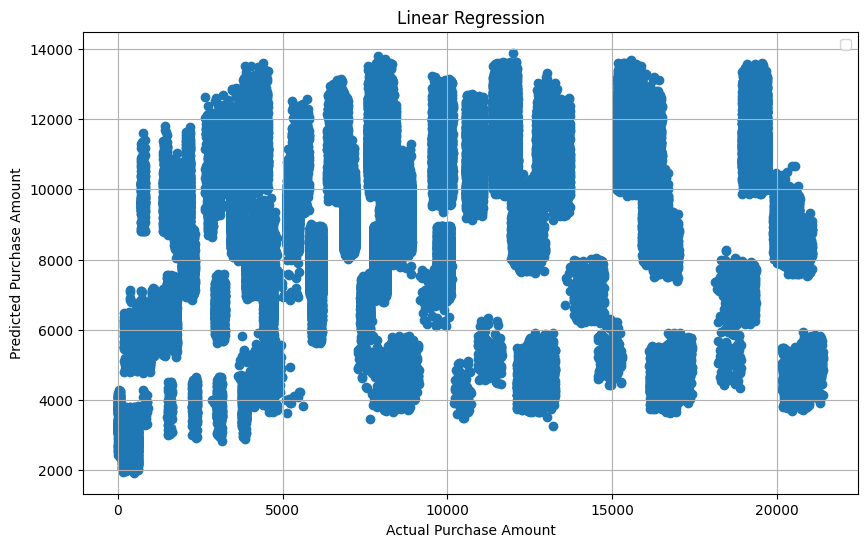

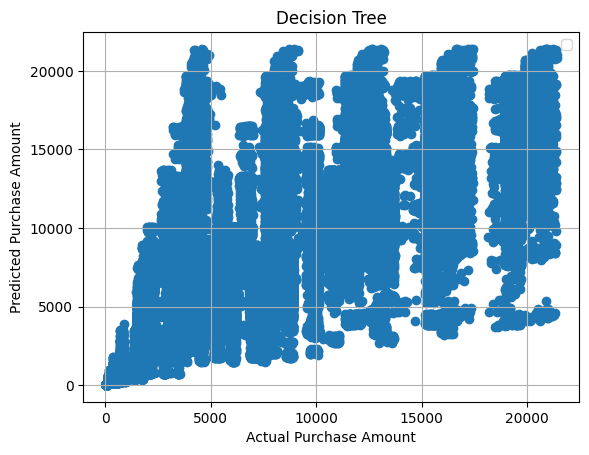

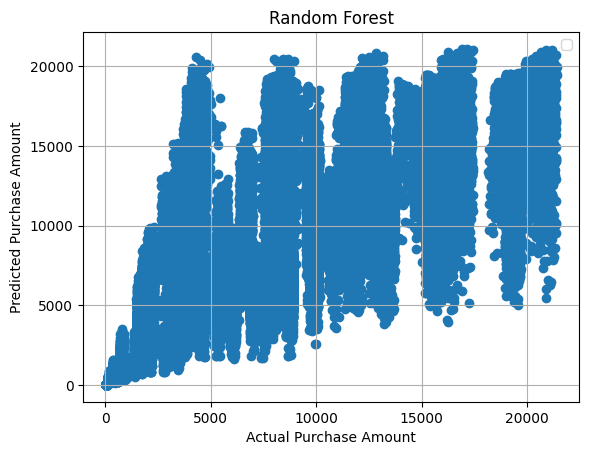

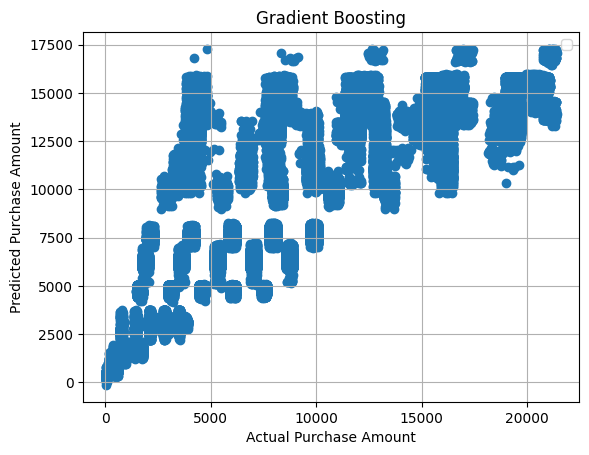

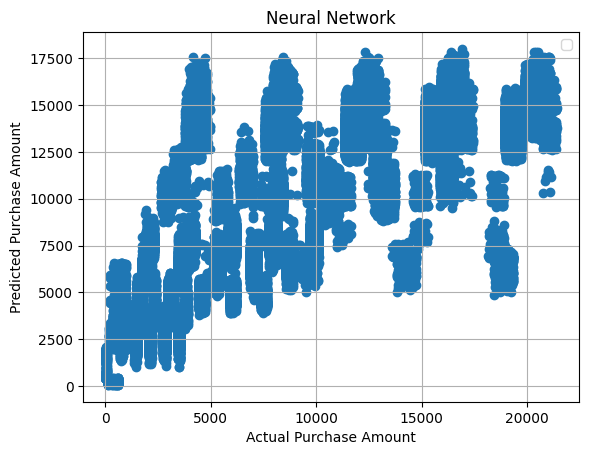

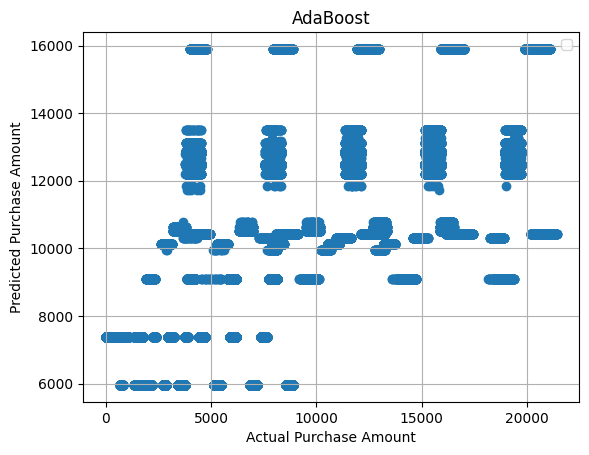

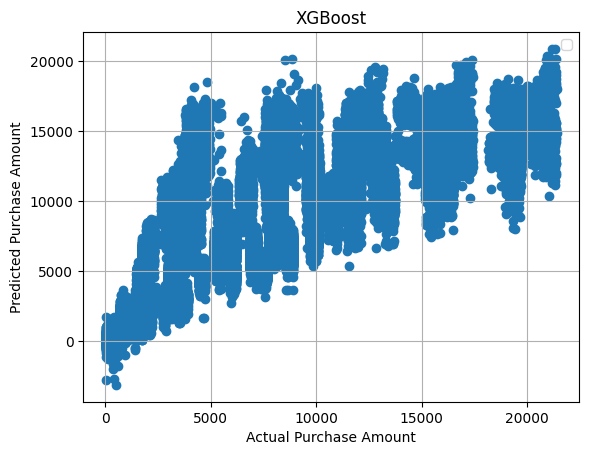

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test, decision_tree_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test, random_forest_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Random Forest')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test, gradient_boosting_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test, neural_network_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Neural Network')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test, ada_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('AdaBoost')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test, xgb_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('XGBoost')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
ada_proportion = ada_rmse / range_target * 100
xgb_proportion = xgb_rmse / range_target * 100

print(f"Error Proportion of RMSE to Range - AdaBoost: {ada_proportion:.3f} %")
print(f"Error Proportion of RMSE to Range - XGBoost {xgb_proportion:.3f} %")

Error Proportion of RMSE to Range - AdaBoost: 16.566 %
Error Proportion of RMSE to Range - XGBoost 13.450 %


We chose the XGBoost algorithm for our model because it consistently provided the lowest Root Mean Square Error (RMSE), with an error RMSE to the range of 13.450 %, indicating better predictive accuracy compared to other algorithms.

# Further Optimization

Since XGBoost is performing the best even agasint the likes of Neural Network Model which is much more computationally expensive, we can aim to maximise the performance of the model by Hyperparameter Tuning using RandomizedSeachCV.

We use RandomizedSeachCV over GridSearchCv as RandomizedSearchCV is often significantly faster than GridSearchCV, especially when dealing with large search spaces.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

In [ ]:
xgb_regressor = XGBRegressor()
random_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X, y)

In [ ]:
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found:",best_params_)
print("Best MSE score:", (-best_score_))

randomized_search_rmse = np.sqrt(-.best_score_
print("Best RMSE score:",randomized_search_rmse))

randomized_search_proportion = randomized_search_rmse / range_target * 100
print("Proportion of RMSE to Range - Neural Network:", randomized_search_proportion)

Restricted by the computational power, I've left the code above without running it for hyperparameter optimization of XGBoost algorithm.